In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import diags

## Задача 1.

Напишите программу, реализующую приближённое решение системы линейных
алгебраических уравнений итерационным методом Якоби. С её помощью
найдите решение системы уравнений следующего вида: А𝑥 = 𝑓

$$
\begin{array}{cl}
a_{i i}=2, & a_{i, i+1}=-1-\alpha, \quad a_{i, i-1}=-1+\alpha \\
f_{1}=1-\alpha, & f_{i}=0, \quad i=2,3, \ldots, n-1, \quad f_{n}=1+\alpha
\end{array}
$$

Какое у этой системы точное решение? С какой скоростью метод сходится
в зависимости от n и α?

In [46]:
def Jacobi(A, f, count = True, eps=10e-5, MAX=10000):
    f = np.array(f)
    A = np.array(A)
    n = f.shape[0]
    x_n1 = np.array(np.zeros(n))
    x_n = np.array(np.zeros(n))
    it = 0
    for _ in range(MAX):
        it += 1
        for i in range(n):
            tmp = 0.0
            for j in range(n):
                if j != i:
                    tmp += A[i, j] * x_n1[j]
            x_n[i] = (f[i] - tmp) / A[i, i]
        if np.linalg.norm(x_n - x_n1) < eps:
            break
        x_n1 = x_n.copy()
    if count:
        return x_n, it
    return x_n

def MakeAf(n, alpha):
    diagonals = [
        2 * np.ones((n)), 
        (-1 - alpha) * np.ones((n-1)),
        (-1 + alpha) * np.ones((n-1))
    ]
    A = diags(diagonals, [0, 1, -1]).toarray()
    f = np.zeros((n, 1))
    f[0] = 1 - alpha
    f[n-1] = 1 + alpha
    return A, f   

Точное решение системы -- единичный столбец. Посмотрим, что скажет Якоби:

In [8]:
A, f = MakeAf(5, 0.95)
print(Jacobi(A, f)[0])

[0.99995939 0.99999695 0.99999791 0.99999992 0.99999997]


Отл. Зависимость от альфы и размерности:

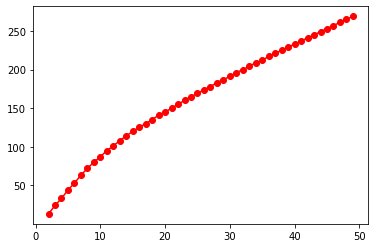

In [37]:
res = []
alpha = 0.35
N = 50
dim = range(2, N)
for d in dim:
    A, f = MakeAf(d, alpha)
    _, it = Jacobi(A, f)
    res.append(it)
plt.scatter(dim, res, c= 'r')
plt.plot(dim, res, c= 'r')
plt.show()

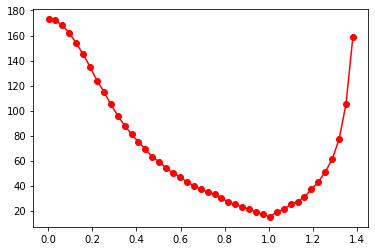

In [35]:
res = []
alphas = np.linspace(0.001, 1.382, 45)
dim = 10
for a in alphas:
    A, f = MakeAf(dim, a)
    _, it = Jacobi(A, f)
    res.append(it)
plt.scatter(alphas, res, c= 'r')
plt.plot(alphas, res, c= 'r')
plt.show()

## Задача 2

 Напишите программу, реализующую приближённое решение системы линейных
 алгебраических уравнений итерационным методом Зейделя. С её помощью
 найдите решение системы уравнений из предыдущей задачи. Сравните между
 собой скорости сходимости итерационных методов Якоби и Зейделя.

In [44]:
def Seidel(A, f, count = True, eps=10e-5, MAX=10000):
    f = np.array(f)
    A = np.array(A)
    n = f.shape[0]
    x_n1 = np.array(np.zeros(n))
    x_n = np.array(np.zeros(n))
    it = 0
    for _ in range(MAX):
        it += 1
        for i in range(n):
            tmp = 0.0
            for j in range(n):
                if j > i:
                    tmp += A[i, j] * x_n1[j]
                if j < i:
                    tmp += A[i, j] * x_n[j]
            x_n[i] = (f[i] - tmp) / A[i, i] 
        if np.linalg.norm(x_n - x_n1) < eps:
            break
        x_n1 = x_n.copy()
    return x_n, it

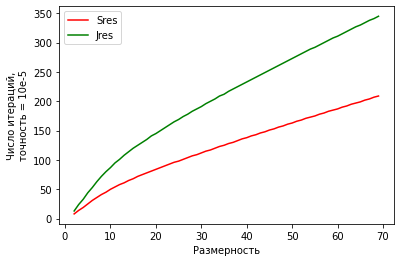

In [63]:
Jres, Sres = [], []
alpha = 0.35
N = 70
dim = range(2, N)
for d in dim:
    A, f = MakeAf(d, alpha)
    _, it = Seidel(A, f)
    Sres.append(it)
    _, it = Jacobi(A, f)
    Jres.append(it)
plt.plot(dim, Sres, label='Sres', c = 'r')
plt.plot(dim, Jres, label='Jres', c = 'g')
plt.xlabel('Размерность')
plt.ylabel('Число итераций,\nточность = 10e-5')
plt.legend()
plt.show()

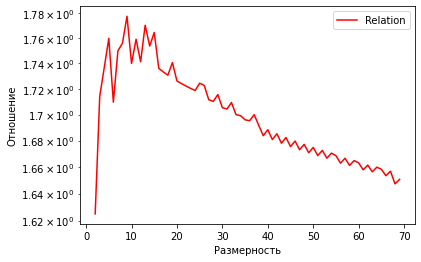

In [66]:
N = 70
dim = range(2, N)
rel = np.array(Jres)/np.array(Sres)
plt.plot(dim, rel, label='Relation', c = 'r')
plt.yscale('log')
plt.xlabel('Размерность')
plt.ylabel('Отношение')
plt.legend()
plt.show()

## Задача 3

 Доказать, что при условии наличия диагонального преобладания у матрицы
 системы метод Зейделя сходится, причем быстрее метода Гаусса–Якоби.

## Задача 4.

 Напишите программу, реализующую приближённое решение системы линейных алгебраических уравнений методом релаксации (обобщение методов Гаусса
 и Зейделя):

$$
\begin{array}{c}
A=L+D+U \\
(D+L) \cdot \frac{x_{k+1}-x_{k}}{\tau_{k+1}}+A x_{k}=f, \quad k=1,2 \ldots
\end{array}
$$

 Исследуйте зависимость скорости сходимости этого итерационного метода от
 итерационного параметра  при численном решении системы
 уравнений из первой задачи в зависимости от параметров n и α.

In [78]:
def SOR(A, f, tau, eps=10e-5, MAX=10000):
    f = np.array(f)
    A = np.array(A)
    n = f.shape[0]
    x_n1 = np.array(np.zeros(n))
    x_n = np.array(np.zeros(n))
    it = 0
    for _ in range(MAX):
        it += 1
        for i in range(n):
            tmp = 0.0
            for j in range(n):
                if j > i:
                    tmp += A[i, j] * x_n1[j] * tau
                if j < i:
                    tmp = tmp + A[i, j] * (x_n[j] - x_n1[j] * (1 - tau))
                if j == i:
                    tmp -= A[i, j] * x_n1[j] * (1 - tau)
            x_n[i] = (f[i] * tau - tmp)/ A[i, i]
        if np.linalg.norm(x_n - x_n1) < eps:
            break
        x_n1 = x_n.copy()
    return x_n, it

## Задача 5.

 Напишите программу, реализующую приближённое решение системы линейных
 алгебраических уравнений методом верхней релаксации:

$$
(D+\tau L) \cdot \frac{x_{k+1}-x_{k}}{\tau}+A x_{k}=f, \quad k=1,2 \ldots
$$

 Исследуйте зависимость скорости сходимости этого итерационного метода
 от итерационного параметра 𝜏 при численном решении системы уравнений
 из первой задачи в зависимости от параметров n и α.

In [79]:
def SOR1(A, f, tau, eps=10e-5, MAX=10000):
    f = np.array(f)
    A = np.array(A)
    n = f.shape[0]
    x_n1 = np.array(np.zeros(n))
    x_n = np.array(np.zeros(n))
    it = 0
    for _ in range(MAX):
        it += 1
        for i in range(n):
            tmp = 0.0
            for j in range(n):
                if j > i:
                    tmp += A[i, j] * x_n1[j]
                if j < i:
                    tmp += A[i, j] * x_n[j]
            x_n[i] = (f[i] - tmp) / A[i, i]
        if np.linalg.norm(x_n - x_n1) < eps:
            break
        x_n = x_n * tau + x_n1 * (1 - tau)
        x_n1 = x_n.copy()
    return x_n, it

### Сравнение 4 и 5

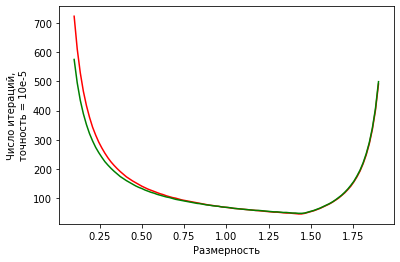

In [80]:
res, res1 = [], []
alpha = 0.35
taus = np.linspace(0.1, 1.9, 100)
dim = 15
A, f = MakeAf(dim, alpha)
for t in taus:
    _, it = SOR(A, f, t)
    res.append(it)
    _, it = SOR1(A, f, t)
    res1.append(it)
plt.plot(taus, res1, c = 'r', label = 'Релаксация')
plt.plot(taus, res, c = 'g', label = 'Верхняя релаксация')
plt.xlabel('Размерность')
plt.ylabel('Число итераций,\nточность = 10e-5')
plt.show()

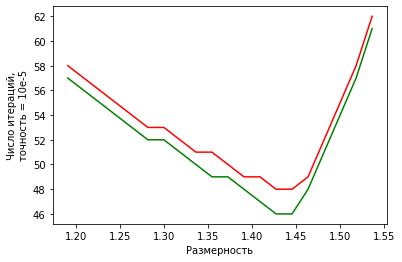

In [85]:
plt.plot(taus[60:80], res[60:80], c = 'r')
plt.plot(taus[60:80], res1[60:80], c = 'g')
plt.xlabel('Размерность')
plt.ylabel('Число итераций,\nточность = 10e-5')
plt.show()

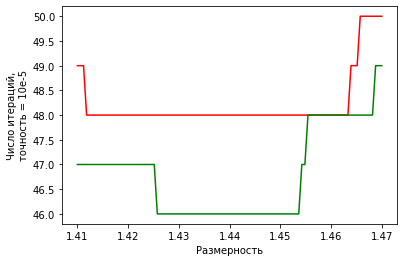

In [87]:
taus_prec = np.linspace(1.41, 1.47, 100)
res_prec, res1_prec = [], []
for t in taus_prec:
    _, it = SOR(A, f, t)
    res_prec.append(it)
    _, it = SOR1(A, f, t)
    res1_prec.append(it)
plt.plot(taus_prec, res_prec, c = 'r')
plt.plot(taus_prec, res1_prec, c = 'g')
plt.xlabel('Размерность')
plt.ylabel('Число итераций,\nточность = 10e-5')
plt.show()